## K-means clustering using Iris dataset

This notebook explores K-means clustering in a 2D and 3D space. 
We will use the `Iris` flower dataset which is used to identify types of flowers based on features describing their petals. 


After loading the dataset, we will extract two of the attributes and will run the K-means algorithm to obtain 3 clusters. 

### 1. Importing the dataset
We will load the dataset directly from the ```scikit-learn``` machine learning library.. We will also print the description of the iris dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# import the iris dataset
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The dataset consists of samples described by four predictor attributes - sepal length, sepal width, petal length, petal width, in centimeters and a label which can take on three discrete values Iris-Setosa, Iris-Versicolour and Iris-Virginica. 

First we will only work with the first two attributes sepal length and sepal width, which will be stored in the variable X.

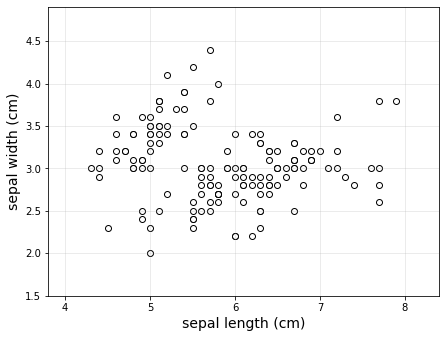

In [2]:
X = iris.data[:, :2]  # we will consider the first two features.

#Plotting the samples in 2D space

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

ax.scatter(X[:, 0], X[:, 1], edgecolor='black', c = 'w')

ax.set_xlabel(iris.feature_names[0], fontsize=14)
ax.set_ylabel(iris.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.show()

### 2. K-means initialisation
 

K-means uses K prototypes to represent each cluster and clusters are formed by assigning samples to the closest prototype. Here we have k=3

The first step is to create 3 prototypes for K-means in 3 random locations.

In [3]:
my_seed = 6 #the seed is used by numpy's random method to generate random numbers
np.random.seed(seed = my_seed)

k = 3 
centers3 = np.random.normal(size=[k, 2]) + np.ones((k,1)) * np.mean(X, axis=0)

Then, the samples in the dataset will be assigned to the nearest prototype. Plotting the first clustering arrangement.

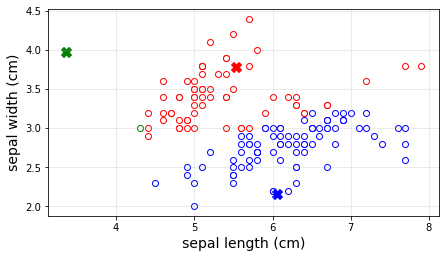

In [4]:
from scipy.spatial import distance

# Find the euclidean distance between every point and every cluster.
distanceMatrix3 = distance.cdist(X, centers3, 'euclidean')

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

overalDistToClusters3 = 0.0

# Make the labe of each point be the closest cluster.
whichCenterNearest = np.argsort(distanceMatrix3, axis=1)[:, 0]

for index in range(len(X)):  
  overalDistToClusters3 += distanceMatrix3[index][whichCenterNearest[index]]
  if whichCenterNearest[index] == 0:
    ax.scatter(X[index, 0], X[index, 1], edgecolor='red', c = 'w')
  if whichCenterNearest[index] == 1:
    ax.scatter(X[index, 0], X[index, 1], edgecolor='blue', c = 'w')
  if whichCenterNearest[index] == 2:
    ax.scatter(X[index, 0], X[index, 1], edgecolor='green', c = 'w')
    
# Plot the centers that we calculated for k-means in the previous cell
ax.scatter(centers3[0, 0], centers3[0, 1], color='red', marker = 'X', s= 100)
ax.scatter(centers3[1, 0], centers3[1, 1], color='blue', marker = 'X', s = 100)
ax.scatter(centers3[2, 0], centers3[2, 1], color='green', marker = 'X', s = 100)

ax.set_xlabel(iris.feature_names[0], fontsize=14)
ax.set_ylabel(iris.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
plt.show()

As you can see, there are 3 prototypes represented by a cross of different colours. Samples are represented by a circle whose colour corresponds to the cluster they have been assigned to. The 3 resulting clusters consist of samples that are close to one another. However, samples in different clusters are also close to one another.  

### 3. K-means iterative update

K-means will proceed iteratively by

1.   Updating the prototypes as the centre of each cluster
2.   Reassigning the samples to the new prototypes

Until the stop criterion it met.

The following code runs K-means and stops when the number of iterations is larger than the value  max_iteration or the difference between the total distances of the consecutive iterations is smaller than the value tol. The clustering arrangement in each iteration will also be plotted.

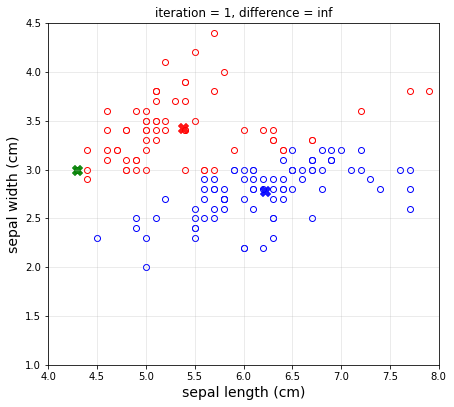

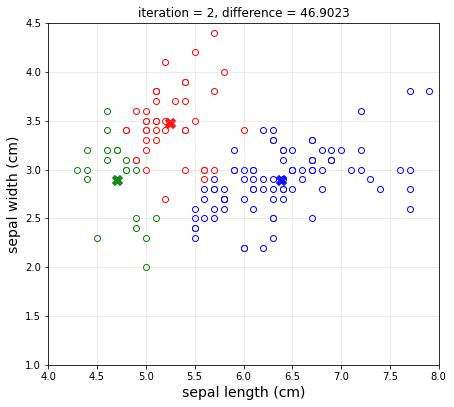

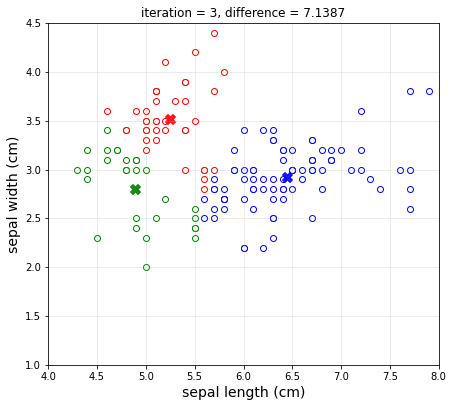

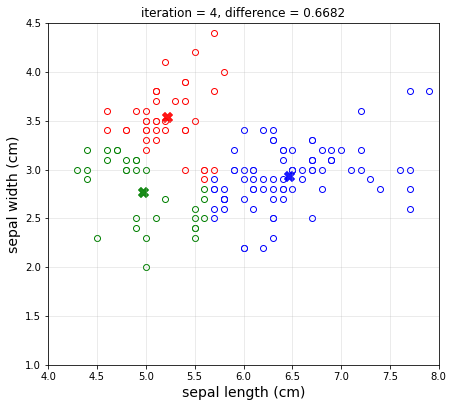

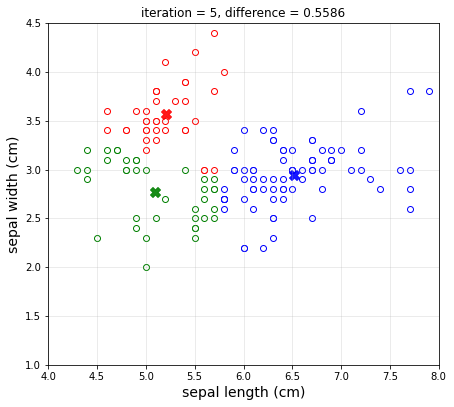

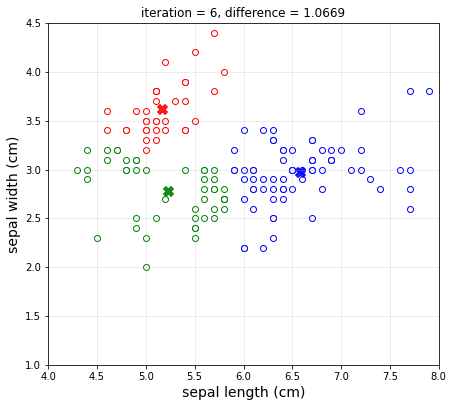

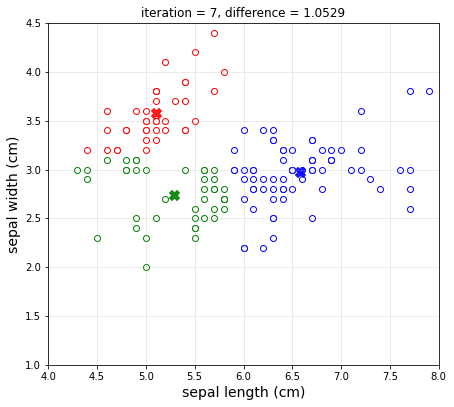

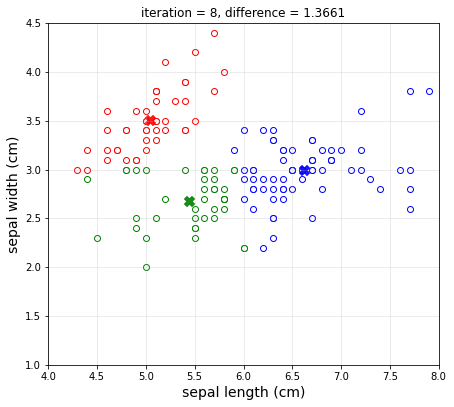

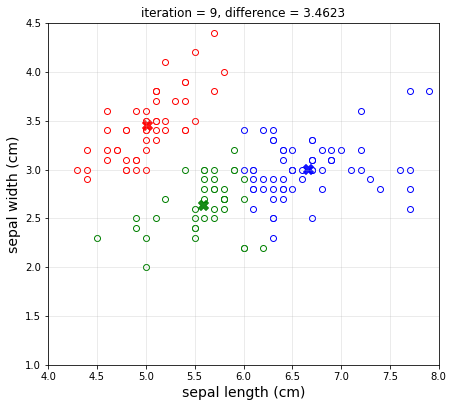

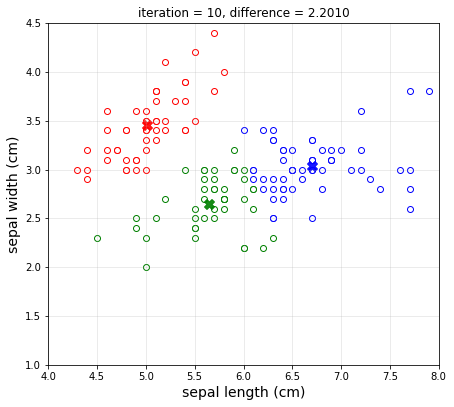

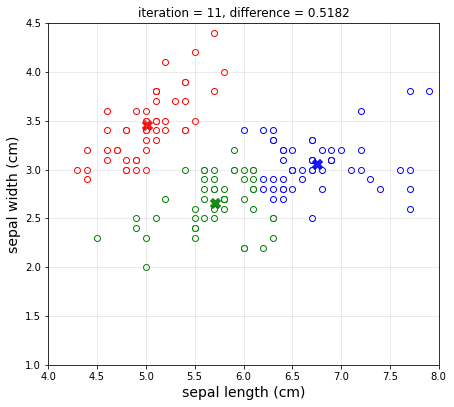

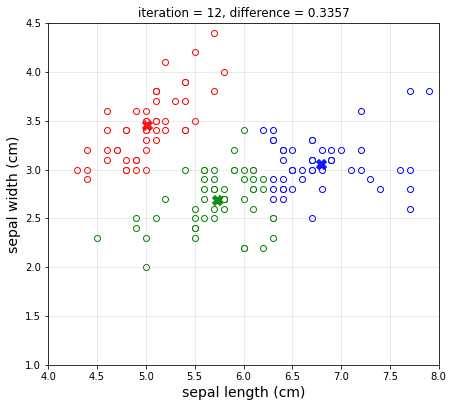

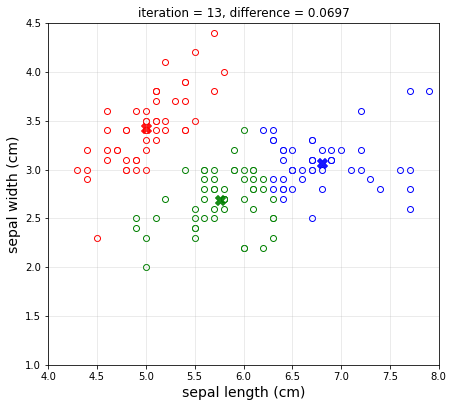

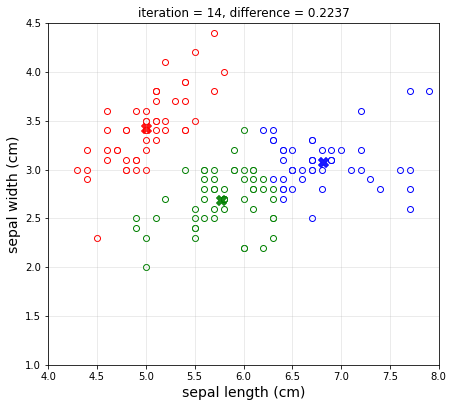

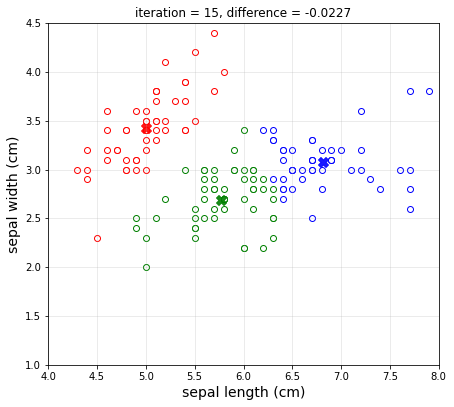

In [5]:
tol = 0.000001
max_iteration = 100
difference = np.inf
iteration = 0
overalDistToClusters3 = [np.inf]

edgecolorlist = ['red', 'blue', 'green']

while difference>tol and iteration<max_iteration:
    
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.set_xlabel(iris.feature_names[0], fontsize=14)
    ax.set_ylabel(iris.feature_names[1], fontsize=14)
    ax.grid(alpha=0.3)
    ax.set_xlim(4, 8)
    ax.set_ylim(1, 4.5)
    
    overalDistToClusters3_new = 0.0
    distanceMatrix3 = distance.cdist(X, centers3, 'euclidean')
    whichCenterNearest = np.argsort(distanceMatrix3, axis=1)[:, 0]

    for index in range(len(X)):
        overalDistToClusters3_new += distanceMatrix3[index][whichCenterNearest[index]]
    difference = overalDistToClusters3[-1] - overalDistToClusters3_new
    overalDistToClusters3.append(overalDistToClusters3_new)
    
    for i in range(k):
        indx = whichCenterNearest==i
        if indx.any():
            centers3[i,:] = np.mean(X[indx,:], axis = 0)
    
        ax.scatter(X[indx, 0], X[indx, 1], edgecolor=edgecolorlist[i], c = 'w')
        ax.scatter(centers3[i, 0], centers3[i, 1], color=edgecolorlist[i], marker = 'X', s= 100, alpha=0.9) 

    iteration +=1
    ax.set_title('iteration = {:d}, difference = {:.4f}'.format(iteration, difference))


plt.show()

There were 15 iterations.

We can check the intra-cluster sample scatter and inter-cluster sample scatter to visually compare the first (random) clustering arrangement and the final one. Plotting the overall distance from each sample to the prototype they have been assigned to in each iteration. This distance is related to the intra-cluster sample scatter.

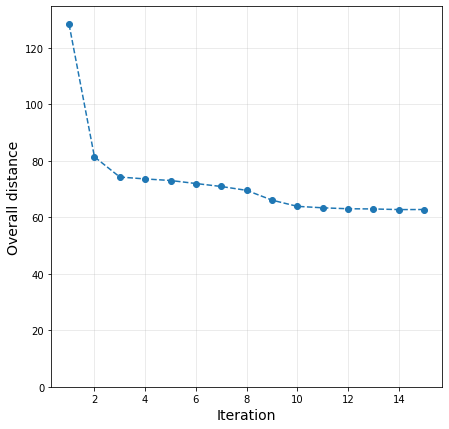

In [6]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Overall distance", fontsize=14)
ax.grid(alpha=0.3)

ax.plot(range(1,len(overalDistToClusters3)), overalDistToClusters3[1:], '--', marker = 'o')
ax.set_ylim([0, overalDistToClusters3[1]*1.05])

plt.show()

### 4. Using 3 predictors

We can also use the first three attributes, sepal length, sepal width and petal length, to define a 3D space and plot the samples in this space. We cannot visualise the dataset in the 4D space defined by the 4 attributes but we can still apply clustering to the full dataset.

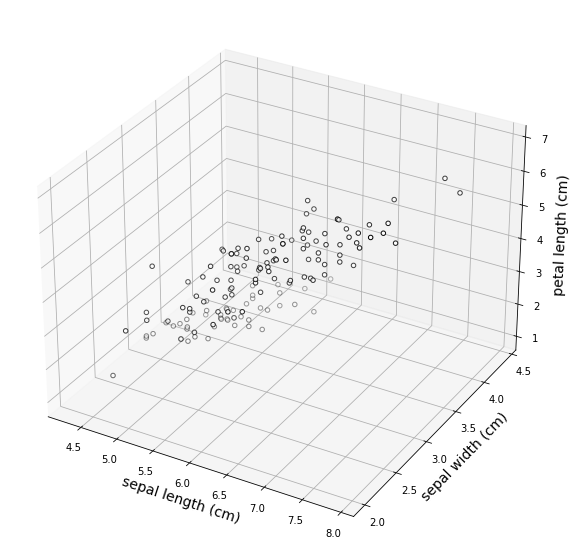

In [7]:
X = iris.data[:, :3] 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor='black', c = 'w')

ax.set_xlabel(iris.feature_names[0], fontsize=14)
ax.set_ylabel(iris.feature_names[1], fontsize=14)
ax.set_zlabel(iris.feature_names[2], fontsize=14)

plt.show()

### 5. Choosing the value of K in the K-means algorithm

This time we can decide how many clusters we want to create. First we will train the K-means algorithm with half of the iris dataset (training set) and then will obtain the overall distance between samples in the other half of the iris dataset (validation set) and the final prototypes. This procedure will be carried out for several values of K, from 1 to 15.

In [8]:
from scipy.spatial import distance

X = iris.data
Xtr = X[::2,:]  #training set
Xval = X[1::2,:] #validation set

number_of_clusters = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
tol = 0.000001
max_iteration = 100
overalDistToClustersFinal = [np.inf]
TrainCost = []
ValCost = []
np.random.seed(seed = 3)


for k in number_of_clusters: 
    
    difference = np.inf
    iteration = 0
    centers = np.random.normal(size=[k, 4]) + np.ones((k,1)) * np.mean(Xtr, axis=0)
    overalDistToClustersIter = [np.inf]


    while difference>tol and iteration<max_iteration:    
        overalDistToClusters3_new = 0.0
        distanceMatrix3 = distance.cdist(Xtr, centers, 'euclidean')
        whichCenterNearest = np.argsort(distanceMatrix3, axis=1)[:, 0]

        for index in range(len(Xtr)):
            overalDistToClusters3_new += distanceMatrix3[index][whichCenterNearest[index]]
      
        difference = overalDistToClustersIter[-1] - overalDistToClusters3_new
        overalDistToClustersIter.append(overalDistToClusters3_new)
    
        for i in range(k):
            indx = whichCenterNearest==i
            if indx.any():
                centers[i,:] = np.mean(Xtr[indx,:], axis = 0)
        iteration +=1
    

    TrainCost.append(overalDistToClustersIter[-1])
    
    overalDistToClustersVal = 0.0
    distanceMatrix3 = distance.cdist(Xval, centers, 'euclidean')
    whichCenterNearest = np.argsort(distanceMatrix3, axis=1)[:, 0]
    for index in range(len(Xtr)):
        overalDistToClustersVal += distanceMatrix3[index][whichCenterNearest[index]]

    ValCost.append(overalDistToClustersVal)

Let's now plot the overall distance between samples in each cluster and their prototype as a function of K for the train and validation sets.

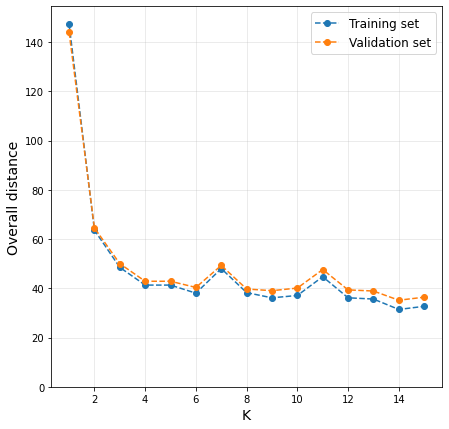

In [9]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

ax.set_xlabel("K", fontsize=14)
ax.set_ylabel("Overall distance", fontsize=14)
ax.grid(alpha=0.3)

ax.plot(number_of_clusters, TrainCost, '--', marker = 'o', label='Training set')
ax.plot(number_of_clusters, ValCost, '--', marker = 'o', label='Validation set')
ax.set_ylim([0, TrainCost[0]*1.05])

ax.legend(fontsize=12)

plt.show()

Baased on the results, we may choose K=4.

### 6. Local solutions in K-means

The K-means algorithm looks for the clustering arrangement that minimises the intra-cluster sample scatter. However, there is no guarantee that K-means will find the so-called global best, but a local one. We could expect K-means to return a different clustering arrangement if the initial location of the prototypes changed. By changing the value of 'my_seed' the initialisation of the prototypes change (We can also use integer numbers like from 2 to 10)

### 7. Conclusions
 
In this notebook we have explored clustering. We have applied the K-means algorithm to the Iris dataset on a 2D and 3D space. First, we have initialised K-means by randomly generating 3 prototypes and creating an initial clustering arrangement. Then, we have iteratively updated the prototypes and reassigned the samples to the nearest prototype. We have observed that changing the initial locations of the prototypes can change the final solution. Finally we also applied the K-means algorithm on a 3D space.